In [2]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting(use_latex=True, pretty_print=False)

# Principal axes example

In [13]:
IBxx = 9.2  # kg m^2
IByy = 11.0
IBzz = 2.8
IBxz = 2.4

In [14]:
N = me.ReferenceFrame('N')

In [15]:
IB_O = me.inertia(N, 9.2, 11.0, 2.8, izx=2.4)

In [16]:
IB_O

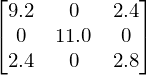

In [17]:
IB_O_mat = IB_O.to_matrix(N)
IB_O_mat

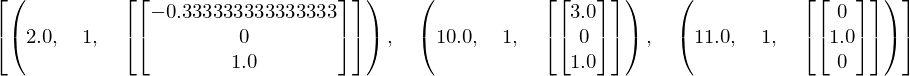

In [18]:
eig_res = IB_O_mat.eigenvects()
eig_res

In [19]:
def parse_eig(eig_tuple):
    ev = eig_tuple[0]
    evec_mat = eig_tuple[-1][0]
    evec = 0 * N.x
    for meas_num, unit_vec in zip(evec_mat, [N.x, N.y, N.z]):
        evec += meas_num * unit_vec
    return ev, evec.normalize()

In [20]:
parse_eig(eig_res[0])

In [21]:
ev1, evec1 = parse_eig(eig_res[0])
ev2, evec2 = parse_eig(eig_res[1])
ev3, evec3 = parse_eig(eig_res[2])

In [23]:
evec1.magnitude()

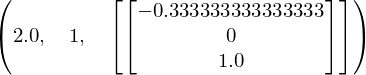

In [24]:
eig_res[0]

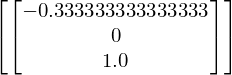

In [25]:
eig_res[0][-1]

In [26]:
type(eig_res[0][-1])

list

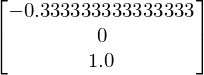

In [27]:
eig_res[0][-1][0]

In [28]:
type(eig_res[0][-1][0])

sympy.matrices.immutable.ImmutableDenseMatrix

In [29]:
for thing in eig_res[0][-1][0]:
    print(thing)

-0.333333333333333
0
1.00000000000000


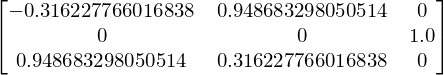

In [30]:
dcm = sm.Matrix([[N.x.dot(evec1), N.x.dot(evec2), N.x.dot(evec3)],
                 [N.y.dot(evec1), N.y.dot(evec2), N.y.dot(evec3)],
                 [N.z.dot(evec1), N.z.dot(evec2), N.z.dot(evec3)],
                ])
dcm

In [31]:
S = N.orientnew('S', 'DCM', dcm)

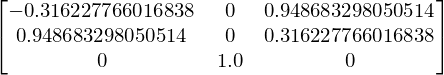

In [32]:
S.dcm(N)

In [33]:
IB_O_S = me.inertia(S, ev1, ev2, ev3)
IB_O_S

In [34]:
IB_O

In [35]:
IB_O.express(S)

In [36]:
IB_O_S.express(N)

In [37]:
sm.acos(S.x.dot(N.x))

In [38]:
1.89 * 180/2/3.14

# Problem 5.8

In [3]:
a, b, rho, theta = sm.symbols('a, b, rho, theta', positive=True)

In [4]:
N = me.ReferenceFrame('N')

In [5]:
x1 = sm.symbols('x1')

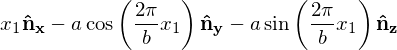

In [6]:
p = x1 * N.x - a * sm.cos(2 * sm.pi * x1 / b) * N.y - a * sm.sin(2 * sm.pi * x1 / b) * N.z
p

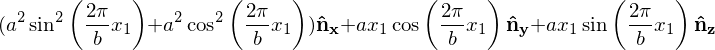

In [7]:
inside_int = p.cross(N.x.cross(p))
inside_int

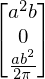

In [8]:
sol = sm.integrate(inside_int.to_matrix(N), (x1, -b/2, b/2))
sol

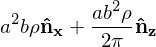

In [9]:
I1_Ho = rho * (sol[0] * N.x + sol[1] * N.y + sol[2] * N.z)
I1_Ho

In [10]:
m = sm.symbols('m')

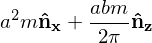

In [11]:
I1_Ho.subs({rho: m / b})

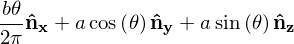

In [19]:
p = b * theta / 2 / sm.pi * N.x + a * sm.cos(theta) * N.y + a * sm.sin(theta) * N.z
p

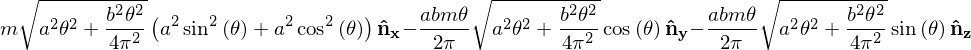

In [16]:
inside_int = m *sm.sqrt((theta * a)**2 + (b * theta / 2 / sm.pi)**2) * p.cross(N.x.cross(p))
inside_int

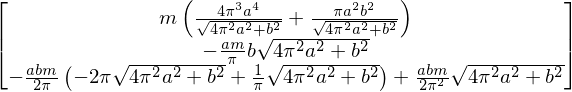

In [21]:
sol = sm.integrate(inside_int.to_matrix(N), (theta, 0, 2 * sm.pi))
sol.simplify()
sol

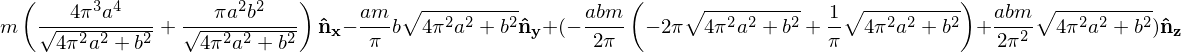

In [22]:
I1_Ho = sol[0] * N.x + sol[1] * N.y + sol[2] * N.z
I1_Ho

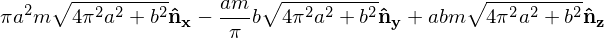

In [23]:
I1_Ho.simplify()